In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [746]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.size

2000

In [747]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

In [748]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [749]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [750]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.00001, solver='liblinear', max_iter=100000, tol=0.000000001).fit(X_train,y_train)

In [751]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [752]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

np.float64(0.7)

In [753]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[10  2]
 [ 7 21]]


Confusion matrix, without normalization
[[10  2]
 [ 7 21]]


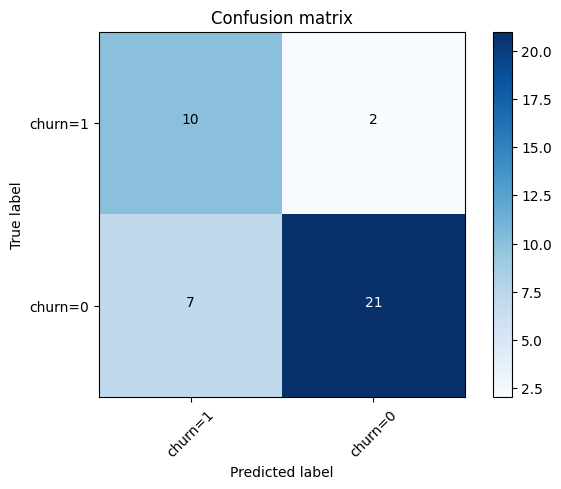

In [754]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [755]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.59      0.83      0.69        12

    accuracy                           0.78        40
   macro avg       0.75      0.79      0.76        40
weighted avg       0.82      0.78      0.78        40



In [756]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6929041797266302